# Python Assessment

## Packages

Before running any code, we install and import any packages that we will need later.

In [4]:
#installing necassary packages
! python -m pip install big_o

In [5]:
#importing necassary packages
import math
import csv
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_path
import pandas as pd
import big_o
import numpy as np

## Algorithm Pseudocode

We have been given the following pseudocode for the Jarvis-March algorithm:

1) S is a set of points in a plane; p,q and r are in S.
2) Initialise p as leftmost point.
3) Do following while we do not come back to the first (or leftmost) point:
<br> a) The next point q is the point such that the triplet (p, q, r) is counterclockwise for any other point r. 
<br> b) next[p] = q (Store q as next of p in the output convex hull). 
<br> c) p = q (Set p as q for next iteration).

We have written an alternative pseudocode for the algorithm:

1) Let the dataset be $X$.
2) If the $X$ has only 1 or 2 elements, return $X$ as the hull.
3) Check if all points in $X$ lie on a straight line - if so, return $X$ as the hull.
4) Let $p_0$ be the leftmost point in $X$, and let $p=p_0$.
5) Let $H$ be a list containing only $p_0$.
6) Let $P$ be an empty list.
7) For each point $q \in X \backslash \{p\}$, consider the ACW angle $pqr$ for all points $r \in X \backslash \{p,q\}$ - if the ACW angle is always between $0$ and $\pi$, then append $q$ to $P$.
8) Let $p'$ be the value in $P$ closest to the current value of $p$.
9) Let $p=p'$, and append the new $p$ to $H$.
10) If $p \neq p_0$, go to step 6.
11) Return $H$ as our covex hull.

While the given pseudocode is simpler than the alternative pseudocode, the alternative pseudocode has several advantages over the given pseudocode. Firstly, the alternative pseudocode considers several edge cases: when the data has only one or two elements, when all points in the data lie on a straight line, and when there are more than two points on the edge of the complex hull which lie on a straight line. The given psuedocode is ambiguous in all these cases. Secondly, the alternative pseudocode is clearer than the given pseudocode: it specifies that $p$, $q$, and $r$ must all be different points, and uses easier to understand notation (for example, defining the convex hull as the list $H$, rather than the ambigous 'next').

## Algorithm Code

We now create a function to find the ACW angle between three given points. In order to simplify the Jarvis-March algorithm, this function always outputs an angle between $-\pi$ and $\pi$ radians.

In [7]:
#function to find the ACW angle between three points
def ACW_angle(A,B,C):
    
    #creating vectors between the points
    AB = (B[0]-A[0],B[1]-A[1])
    BC = (C[0]-B[0],C[1]-B[1])
    
    #calculating the ACW angles between the x-axis and the vectors
    AB_xangle = math.atan2(AB[0],AB[1])
    BC_xangle = math.atan2(BC[0],BC[1])
    
    #calculating the angle between the vectors
    angle = BC_xangle - AB_xangle
    
    #making sure the angle is between -pi and pi
    while angle <= (-1*math.pi):
        angle = angle+(2*math.pi)
    while angle > math.pi:
        angle = angle-(2*math.pi)
    
    #outputting the final angle
    return(angle)

We now create a function to execute the Jarvis-March algorithm on a given set of data, where the data is given as a list of 2-tuples. Note that if more than two points lie on a straight line on the convex hull, the algorithm will include all of those points. The algorithm also deals with edge cases, such as duplicates in the data, the data containing only one or two points, and all points lying on a straight line.

In [24]:
#function to run the Jarvis-March algorithm
def Jarvis_March(data):
    
    #making sure that we have inputted a list of 2-tuples
    if type(data) != list:
        return('Error: object given as input is not a list of 2-tuples')
    if len(data) == 0:
        return('Error: object given as input is not a list of 2-tuples')
    for i in range(len(data)):
        if type(data[i]) != tuple:
            return('Error: object given as input is not a list of 2-tuples')
        if len(data[i]) != 2:
            return('Error: object given as input is not a list of 2-tuples')
    
    #remove duplicates
    data = list(set(data))
    
    #the size of the data (with duplicates removed)
    n=len(data)
    
    #case where we have only one or two points
    if n <= 2:
        hull = data
        return(hull)
    
    #case where all points lie on a straight line
    straight_line = 1
    for r in data[2:]:
        if (ACW_angle(data[0],data[1],r) != 0) and (ACW_angle(data[0],data[1],r) != math.pi):
            straight_line = 0
    if straight_line == 1:
        hull = sorted(data, key=lambda i: (i[0],i[1]))
        return(hull)
    
    #picking the initial point based on the smallest x value
    data_ordered = sorted(data, key=lambda i: (i[0],i[1]))
    p0 = data_ordered[0]
    
    #the list of points in our convex hull, at first just the initial point
    hull = [p0]
    
    #the current point is the intial point at first
    p_curr = p0
    
    #running the algorithm until we find the solution
    while True:
        
        #an empty list (it will contain the possible next values of p)
        p_next = []
        
        #we check every point other than the current
        for q in data:
            if q != p_curr:
                
                #intial value of how many angles are positive
                pos = 0
                
                #for each point other than current p and q, we check if the angle is positive
                for r in data:
                    if (r != q) and (r != p_curr):
                        if ACW_angle(p_curr,q,r) >= 0:
                            pos = pos + 1
                
                #if all angles are positive, we make q a possible next value of p
                if pos == (n-2):
                    p_next.append(q)
                
        #if there are no possible next values of p, we have an error
        if len(p_next) == 0:
            return('Error: Algorithm stopped due to no next possible value of p')
        
        #if there is one possible next value of p, then it becomes the next p
        if len(p_next) == 1:
            p_next_1 = p_next[0]
        
        #if there are multiple possible next values of p, we choose the closest possible value of p
        if len(p_next) >= 2:
            p_dist = math.inf
            for p in p_next:
                dist = ((p_curr[0]-p[0])**2 + (p_curr[1]-p[1])**2)**0.5
                if dist < p_dist:
                    p_dist = dist
                    p_next_1 = p
            
        #adding the new value to the hull
        hull.append(p_next_1)
        
        #making the new value the current value for the next iteration
        p_curr = p_next_1
        
        #checking if the current value is the inital value - if so, we output the convex hull
        if p_curr == p0:
            return(hull)

## Plot Code

In this section we make a function that, given a dataset, returns a plot of the dataset with the convex hull shown.

In [28]:
#function to plot the data with its convex hull
def plot_hull(data):
    
    #turning the whole dataset into a pandas datframe
    X = [i[0] for i in data]
    Y = [i[1] for i in data]
    df = pd.DataFrame({"X" : X,"Y" : Y})
    
    #finding the convex hull using the previous function
    convex_hull = Jarvis_March(data)
    
    #situation for when the Jarvis-March algorithm does not return a dataset
    if type(convex_hull) == str:
        return('We cannot plot a convex hull for this data due to an error in the Jarvis-March algorithm')
    
    #turning the convex hull into a pandas datframe
    X_hull = [i[0] for i in convex_hull]
    Y_hull = [i[1] for i in convex_hull]
    df_hull = pd.DataFrame({"X" : X_hull,"Y" : Y_hull})
    
    #drawing the plot
    plot = ggplot() + geom_point(df,aes(x=X,y=Y)) + geom_point(df_hull, aes(x=X_hull,y=Y_hull), color='red') + geom_path(df_hull, aes(x=X_hull,y=Y_hull), color='red')
    
    #outputting the plot
    return(plot)

## Testing Our Code

Testing the algorithm on different inputs:

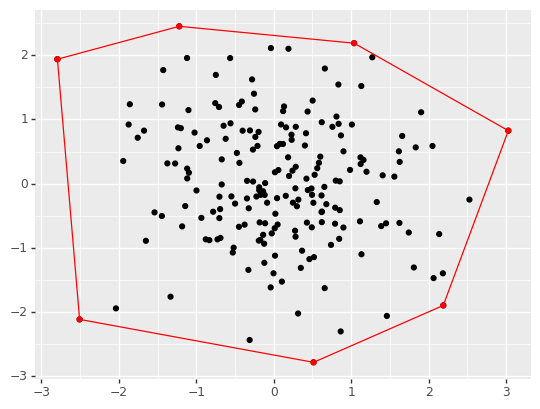

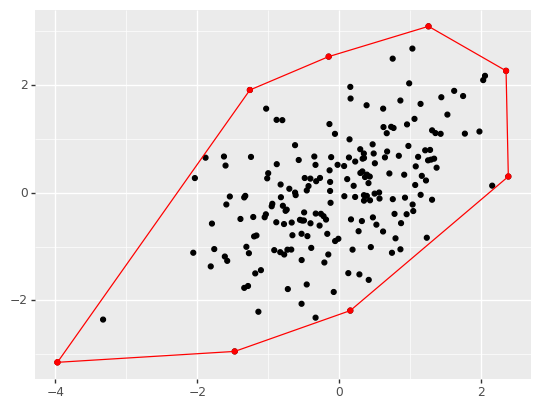

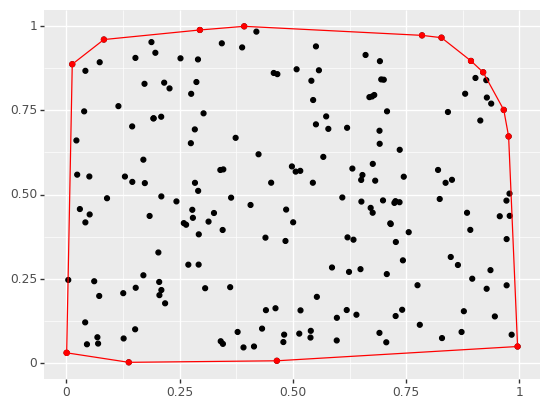

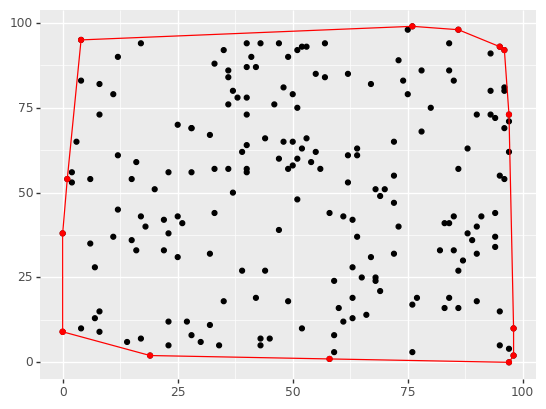

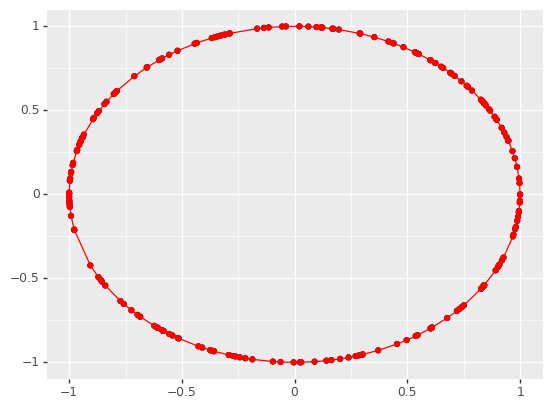

In [112]:
#multivariate normal, no correlation
np.random.seed(1)
n=200
mean = [0,0]
var = [[1,0],[0,1]]
arr = np.random.multivariate_normal(mean,var,n)
li = []
for i in range(len(arr)):
    li.append((arr[i,0],arr[i,1]))
print(plot_hull(li))

#multivariate normal, positive correlation
np.random.seed(2)
n=200
mean = [0,0]
var = [[1,0.5],[0.5,1]]
arr = np.random.multivariate_normal(mean,var,n)
li = []
for i in range(len(arr)):
    li.append((arr[i,0],arr[i,1]))
print(plot_hull(li))

#uniform random (continous)
np.random.seed(3)
n=200
li = []
for i in range(n):
    li.append((np.random.random(),np.random.random()))
print(plot_hull(li))

#uniform random (integers)
np.random.seed(4)
n=200
li = []
for i in range(n):
    li.append((math.floor(100*np.random.random()),math.floor(100*np.random.random())))
print(plot_hull(li))

#unit circle of points
np.random.seed(5)
n=200
li = []
for i in range(n):
    theta = np.random.uniform(0,math.pi/2)
    xpos = np.random.choice([-1,1])
    ypos = np.random.choice([-1,1])
    x = xpos * math.cos(theta)
    y = ypos * math.sin(theta)
    li.append((x,y))
print(plot_hull(li))

All inputs behave as expected (the resulting convex hull looks sensible).

Testing the algorithm on edge cases:

In [25]:
#edge case: only 1 point
print(Jarvis_March([(1,1)]))

#edge case: only 2 points
print(Jarvis_March([(1,1),(2,2)]))

#edge case: all points in a straight line
print(Jarvis_March([(1,1),(1,2),(1,3),(1,4),(1,5)]))
print(Jarvis_March([(0,0),(1,2),(2,4),(3,6)]))

#edge case: more than two points on a straight line on the convex hull
print(Jarvis_March([(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)]))
print(Jarvis_March([(0,0),(1,2),(2,4),(3,3)]))

#edge case: duplicate values
print(Jarvis_March([(0,0),(0,0)]))
print(Jarvis_March([(1,1),(1,1),(1,1),(1,2),(2,2),(2,2)]))

#edge case: something other than a list of 2-tuples given as input
print(Jarvis_March(1))
print(Jarvis_March([]))
print(Jarvis_March([1]))
print(Jarvis_March([(0,0),(1,1,1)]))

[(1, 1)]
[(1, 1), (2, 2)]
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
[(0, 0), (1, 2), (2, 4), (3, 6)]
[(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (2, 1), (1, 1)]
[(0, 0), (1, 2), (2, 4), (3, 3), (0, 0)]
[(0, 0)]
[(1, 1), (1, 2), (2, 2), (1, 1)]
Error: object given as input is not a list of 2-tuples
Error: object given as input is not a list of 2-tuples
Error: object given as input is not a list of 2-tuples
Error: object given as input is not a list of 2-tuples


All edge cases behave as expected.

## Provided Data

Our algorithm function behaves how we expect it to, so we can now use it on the provided data. The following code converts the provided data from .csv files to workable python objects (lists of tuples).

In [6]:
#inputting the data into readable form

#line
with open('line.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_data = []
    for row in csv_reader :
        line_data.append((float(row[0]),float(row[1])))

#pgram (note: I have removed empty lines from the file before loading it in)
with open('pgram.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    pgram_data = []
    for row in csv_reader :
        pgram_data.append((float(row[0]),float(row[1])))

#pines
with open('pines.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    pines_data = []
    for row in csv_reader :
        pines_data.append((float(row[1]),float(row[2])))

#random
with open('random.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    random_data = []
    for row in csv_reader :
        random_data.append((float(row[0]),float(row[1])))

#square
with open('square.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    square_data = []
    for row in csv_reader :
        square_data.append((float(row[0]),float(row[1])))

We now run the algoirthm on the given data, resulting in the convex hulls below (given both as lists of tuples and plots).

In [26]:
line_hull = Jarvis_March(line_data)
pgram_hull = Jarvis_March(pgram_data)
pines_hull = Jarvis_March(pines_data)
random_hull = Jarvis_March(random_data)
square_hull = Jarvis_March(square_data)

In [27]:
print(line_hull)
print()
print(pgram_hull)
print()
print(pines_hull)
print()
print(random_hull)
print()
print(square_hull)

[(1.0, 1.0), (2.0, 2.0), (3.0, 3.0)]

[(1.0, 1.0), (2.0, 2.0), (2.5, 2.5), (3.0, 2.0), (2.0, 1.0), (1.0, 1.0)]

[(0.1, 7.2), (0.1, 9.9), (5.3, 9.8), (7.5, 9.3), (8.7, 8.7), (9.2, 8.1), (9.5, 6.2), (9.5, 4.6), (9.5, 2.3), (9.4, 1.0), (9.3, 0.8), (6.9, 0.4), (2.0, 0.2), (1.4, 1.6), (0.2, 6.2), (0.1, 7.2)]

[(-0.71657388106957, 1.20219702232312), (-0.545292317957066, 1.4050365090573), (-0.380951747864001, 1.45310545712829), (0.358984412999769, 1.56677311480003), (0.505823570824408, 1.12001307650065), (0.353922330922547, 0.654945271536898), (0.156196864138666, 0.537196258340319), (-0.432249029757549, 0.600185398765638), (-0.605200231305254, 0.957134110706781), (-0.71657388106957, 1.20219702232312)]

[(1.0, 1.0), (1.0, 2.0), (1.5, 2.5), (2.0, 2.0), (2.0, 1.0), (1.0, 1.0)]


Plot of 'line':


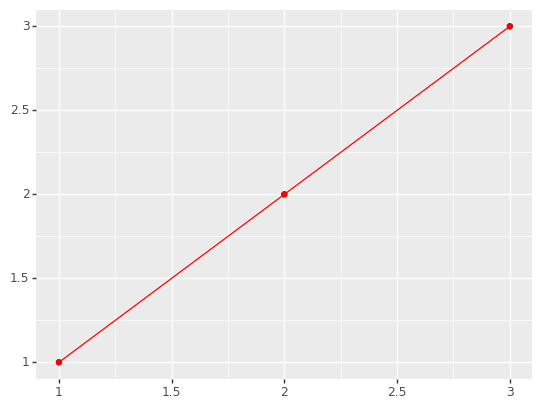


Plot of 'pgram':


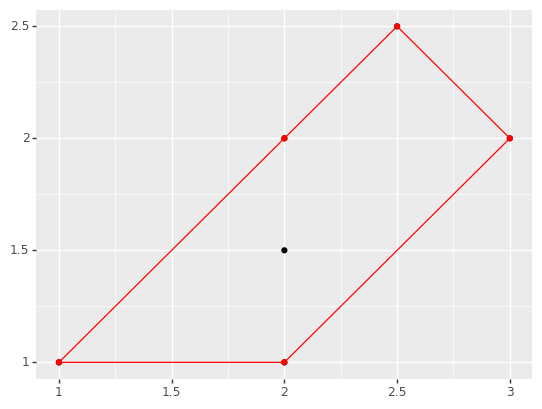


Plot of 'pines':


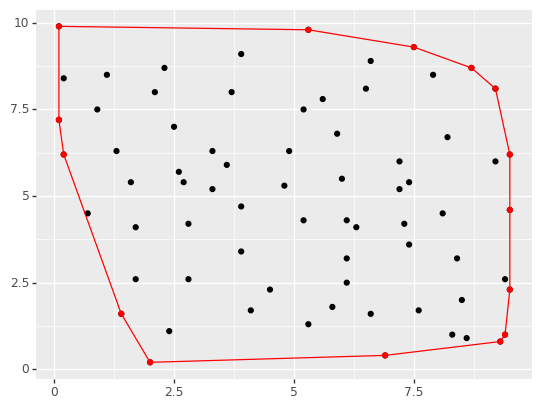


Plot of 'random':


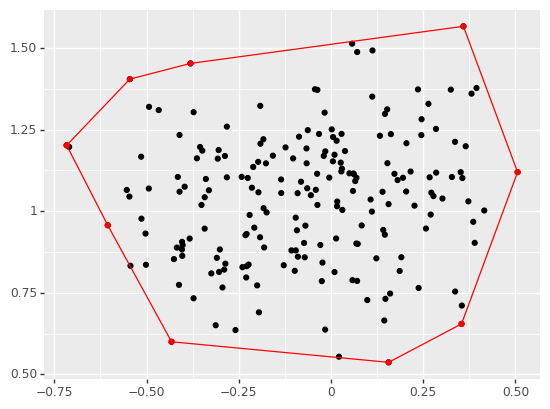


Plot of 'sqaure':


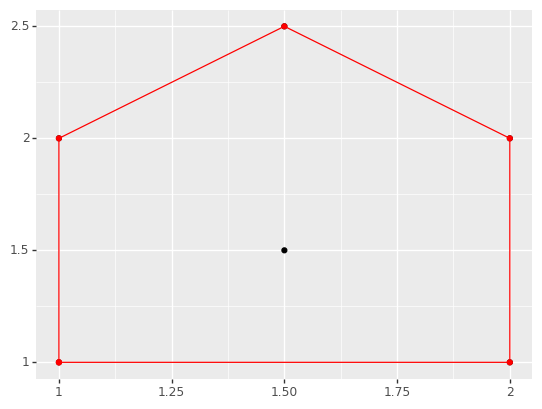

In [29]:
print("Plot of 'line':")
print(plot_hull(line_data))
print("Plot of 'pgram':")
print(plot_hull(pgram_data))
print("Plot of 'pines':")
print(plot_hull(pines_data))
print("Plot of 'random':")
print(plot_hull(random_data))
print("Plot of 'sqaure':")
print(plot_hull(square_data))

## Computational Complexity

First, we investigate the computational complexity theoretically. Let $n$ be the size of our data. First, we check the data is the correct type, and that all points lie do not lie on a straight line. Both of these steps are $O(n)$. Then for each point in the hull $p$ we check the angle between $p$, $n-1$ points $q$, and $n-2$ points $r$. If there are $h$ points in the hull, this means the algorithm has computational complexity $O(h(n-1)(n-2))$. Overall, this means that the algorithm has complexity $O(n^2h)$. Clearly $h \leq n$, so the computational complexity should be between $O(n^2)$ and $O(n^3)$ $-$ the smaller $h$ is compared to $n$, the closer the compuational complexity will be to $O(n^2)$.

We will now investigate the computational complexity empirically, using data generated by five different methods: generated from a bivariate normal distribution with no correlation, generated from a bivariate normal distribution with some positive correlatation, generated uniformly in a given continous range, generated uniformly in a given integer range, and generated uniformly on the unit circle. Note that this code may take a long time to run, particularly the final case.

In [121]:
#finding the computational complexity of the algorithm with data from a bivariate normal (no correlation)
np.random.seed(1)
def data_generator(n):
    mean = [0,0]
    var = [[1,0],[0,1]]
    arr = np.random.multivariate_normal(mean,var,n)
    li = []
    for i in range(len(arr)):
        li.append((arr[i,0],arr[i,1]))
    return(li)
best, others = big_o.big_o(Jarvis_March, data_generator, n_repeats=10, max_n=500)
print(best)

Polynomial: time = -10 * x^2.2 (sec)


In [114]:
#finding the computational complexity of the algorithm with data from a bivariate normal (positive correlation)
np.random.seed(2)
def data_generator(n):
    mean = [0,0]
    var = [[1,0.5],[0.5,1]]
    arr = np.random.multivariate_normal(mean,var,n)
    li = []
    for i in range(len(arr)):
        li.append((arr[i,0],arr[i,1]))
    return(li)
best, others = big_o.big_o(Jarvis_March, data_generator, n_repeats=10, max_n=500)
print(best)

Polynomial: time = -9.3 * x^2 (sec)


In [115]:
#finding the computational complexity of the algorithm with uniformly random data
np.random.seed(3)
def data_generator(n):
    li = []
    for i in range(n):
        li.append((np.random.random(),np.random.random()))
    return(li)
best, others = big_o.big_o(Jarvis_March, data_generator, n_repeats=10, max_n=500)
print(best)

Polynomial: time = -10 * x^2.2 (sec)


In [116]:
#finding the computational complexity of the algorithm with uniformly random integer data
np.random.seed(4)
def data_generator(n):
    li = []
    for i in range(n):
        li.append((math.floor(100*np.random.random()),math.floor(100*np.random.random())))
    return(li)
best, others = big_o.big_o(Jarvis_March, data_generator, n_repeats=10, max_n=500)
print(best)

Polynomial: time = -9.6 * x^2.2 (sec)


In [122]:
#finding the computational complexity of the algorithm with unit circle data
np.random.seed(5)
def data_generator(n):
    li = []
    for i in range(n):
        theta = np.random.uniform(0,math.pi/2)
        xpos = np.random.choice([-1,1])
        ypos = np.random.choice([-1,1])
        x = xpos * math.cos(theta)
        y = ypos * math.sin(theta)
        li.append((x,y))
    return(li)
best, others = big_o.big_o(Jarvis_March, data_generator, n_repeats=10, max_n=500)
print(best)

Polynomial: time = -12 * x^3 (sec)


In the first four cases, the computational complexity of the algorithm is between $O(n^2)$ and $O(n^3)$, but closer to $O(n^2)$ $-$ as we expect when the size of the convex hull is small compared to the size of the data. In the final case, the convex hull is the whole dataset, so the compuational complexity is around $O(n^3)$.